# Section 2

## Linear Regression:

<img src="linearreg.png">


<img src="linearreg 2.png">


<img src="linearreg 3.png">


### The Normal Equation

<img src="normaleq.png">


In [1]:
#Let’s generate some linear_looking data to test this equation on (Figure 4_1):
# In
import numpy as np
X = 2 * np.random.rand(100, 1) #I/P
y = 4 + 3 * X + np.random.randn(100, 1) #O/P

<img src="fig41.png">

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

 The addition of the bias term is necessary for certain algorithms, like linear regression, where the model needs to account for an intercept term (the bias) in addition to the coefficients for the features (X). When training a linear regression model with this extended data matrix Xb, the model will learn both the coefficients for the features and the bias term, which allows for a better fit to the data.

 In summary, the purpose of adding x0 = 1 to each instance is to introduce a bias term in the linear regression model to improve its ability to fit the data accurately.

In [ ]:
# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.
# Let’s see what the equation found:
theta_best

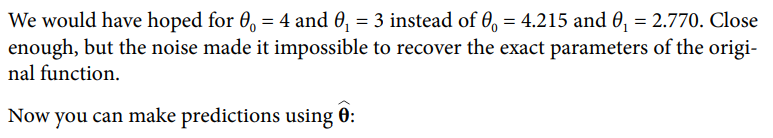

In [40]:
# Making prediction
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance, 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.92769417],
       [9.98117537]])

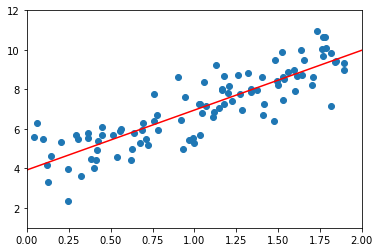

In [53]:
# Plot
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r_")
plt.scatter(X, y)
plt.axis([0, 2, 1, 12])
#plt.tight_layout()
#plt.show()

In [61]:
# using scikit learn is more simple
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) #Training
print("Intercept: ",lin_reg.intercept_,"\n","Coef: ",lin_reg.coef_,"\n","Y_HAT:",lin_reg.predict(X_new))

Intercept:  [3.92769417] 
 Coef:  [[3.0267406]] 
 Y_HAT: [[3.92769417]
 [9.98117537]]


In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e6)
theta_best_svd

array([[3.68932438],
       [3.3066536 ]])

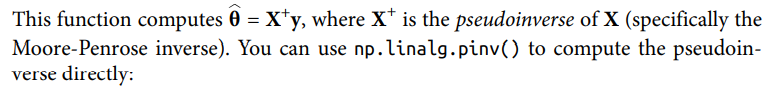

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.68932438],
       [3.3066536 ]])

## Gradient Descent

<img src='fig4.3.png'>

<img src="fig4.4 intro.png">

<img src="fig4.5.png">

### Batch Gradient Descent

<img src="batchgradintro.png">

<img src="eq4.6.png">

<img src="eq4.7.png">

In [15]:
eta = 0.1 # learning rate or alpha
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.68932438],
       [3.3066536 ]])

<img src="fig4.8.png">

### Stochastic Gradient Descent

<img src="fig4.9.png">

<img src="stochgradientdesccodeintro.png">

In [17]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

<img src = 'stochastictheta.png'>

In [18]:
theta

array([[3.72224651],
       [3.25983748]])

<img src = 'fig4.10.png'>

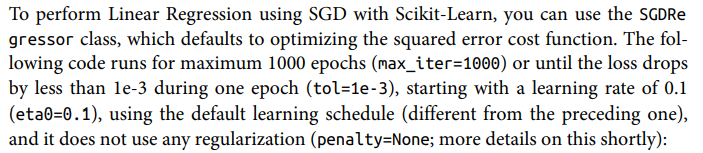

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e_3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

#Once again, you find a solution quite close to the one returned by the Normal Equa‐tion:

sgd_reg.intercept_, sgd_reg.coef